In [1]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#Load the Data

data = pd.read_csv('M1_final.csv')
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


#Explore data

In [3]:
#Start to get more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

#Exploration data analyse 

In [4]:
#To help see process the unprocess data
def preprocess_inputs(df):
    df = df.copy()
    return df

In [5]:
# print the data
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [6]:
# check the missing value on each coloumn  
data.isna().sum()
#and mean is for see the percentage of missing value if the sum value abit higher
#data.isna().mean()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

from above so no missing data so we can good to go start

In [7]:
# Data that already process
DT = preprocess_inputs(data)

#print to double check if the data identical or not and see the difference
DT

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [8]:
#Change the coloumn name into more undestandable to analyse
column_names = {"OP_UNIQUE_CARRIER":"CARRIER_CODE",
                "TAIL_NUM":"FLIGHT_NO",
                "CRS_ELAPSED_TIME":"SCHEDULED_DURATION",
                "CRS_DEP_M":"SCHEDULED_DEPARTURE",
                "DEP_TIME_M":"ACTUAL_DEP_TIME",
                "CRS_ARR_M":"SCHEDULED_ARRIVAL",
                "sch_dep":"FLT_SCH_ARRIVAL",
                "sch_arr":"FLT_SCH_DEPARTURE"
               }

df = DT.rename(column_names, axis=1)


In [9]:
#To see more colomn for the output display data frame 
#in here i want to see the maximum output of coloumn

pd.set_option('display.max_columns', None)

In [10]:
#Drop the unnecessary data
df = df.drop(['Temperature','Dew Point','Humidity','Wind','Wind Speed','Wind Gust','Pressure','Condition'], axis=1)
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,FLIGHT_NO,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,1372,1427,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,1392,25,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,1408,1337,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,1422,261,19,23,13


In [11]:
#to one on hot encode the carrier code
pd.get_dummies(df['CARRIER_CODE'])

,9E,AA,AS,B6,DL,HA,MQ,OO,YX
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
28815,0,0,0,1,0,0,0,0,0
28816,0,1,0,0,0,0,0,0,0
28817,0,0,1,0,0,0,0,0,0
28818,0,0,0,1,0,0,0,0,0


In [12]:
#Create the list for carrier/ airlines
CARRIER_LIST= df.groupby(["CARRIER_CODE"]).count().sort_values(by=['SCHEDULED_DEPARTURE'],ascending=False)
CARRIER_LIST

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_NO,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
CARRIER_CODE,,,,,,,,,,,,,,
B6,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589,9589
DL,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680,7680
9E,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485,4485
AA,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
AS,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
MQ,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
YX,914,914,914,914,914,914,914,914,914,914,914,914,914,914
OO,311,311,311,311,311,311,311,311,311,311,311,311,311,311
HA,90,90,90,90,90,90,90,90,90,90,90,90,90,90


Text(0, 0.5, 'DEP_DELAY')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


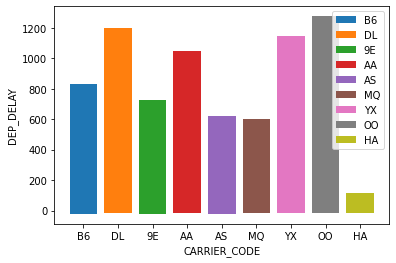

In [13]:
##Create the list for carrier/ airlines
CARRIER_LIST= df.groupby(["CARRIER_CODE"]).count().sort_values(by=['DEP_DELAY'],ascending=False).index

#loop for iterate to create the histogram for coleration between airlines and the delay
fig, ax=plt.subplots()

for name in CARRIER_LIST:
    #print(name)
    airlines_code = df[df['CARRIER_CODE']== name]
    #print(place_df)

    # extract x/y
    x = airlines_code['CARRIER_CODE']
    y = airlines_code['DEP_DELAY']
    ax.bar(x,y, label=name)

ax.legend()
ax.set_xlabel("CARRIER_CODE")
ax.set_ylabel("DEP_DELAY")

Text(0, 0.5, 'ACTUAL_DEP_TIME')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


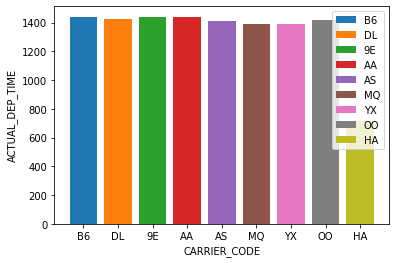

In [14]:
#Create histogram between airlines and actual depature time

#loop for iterate to create the histogram for coleration between airlines and the delay
fig, ax=plt.subplots()

for name in CARRIER_LIST:
    #print(name)
    airlines_code = df[df['CARRIER_CODE']== name]
    #print(place_df)

    # extract x/y
    x = airlines_code['CARRIER_CODE']
    y = airlines_code['ACTUAL_DEP_TIME']
    ax.bar(x,y, label=name)

ax.legend()
ax.set_xlabel("CARRIER_CODE")
ax.set_ylabel("ACTUAL_DEP_TIME")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


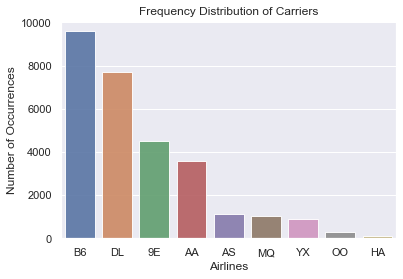

In [15]:
#count the airlines have schedule flight
CARRIER_COUNT = df["CARRIER_CODE"].value_counts()

# Check the coleration between airlines and the frequent schedule of flight that they have
sns.set(style="darkgrid")
sns.barplot(CARRIER_COUNT.index, CARRIER_COUNT.values, alpha=0.9)

#create the legend for the histogram
plt.title("Frequency Distribution of Carriers")
plt.ylabel("Number of Occurrences", fontsize = 12)
plt.xlabel("Airlines", fontsize = 12)
plt.show()

In [16]:
#import the library to need to run the machine learning
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [17]:
df.copy()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER_CODE,FLIGHT_NO,DEST,DEP_DELAY,SCHEDULED_DURATION,DISTANCE,SCHEDULED_DEPARTURE,ACTUAL_DEP_TIME,SCHEDULED_ARRIVAL,FLT_SCH_ARRIVAL,FLT_SCH_DEPARTURE,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,1372,1427,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,1392,25,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,1408,1337,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,1422,261,19,23,13


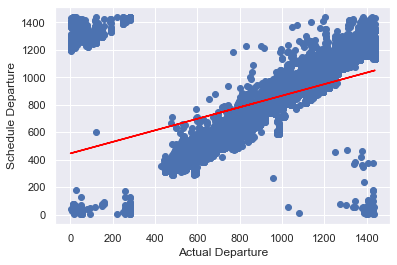

In [32]:
# take the ACTUAL_DEP_TIME as X axis & SCHEDULED_DEPARTURE as Y axis

X = df.iloc[: , 11].values.reshape(-1, 1)
Y = df.iloc[: , 10].values.reshape(-1, 1)

#Split the data set I choose 70 train and 30 for test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

#We need to build OLS(Ordinary Least Squares) Prediction
#Create linear regresion object
linear_regressor = LinearRegression()
#Perform linear regression
linear_regressor.fit(X_train,Y_train)
#Make the actual predictons
Y_pred = linear_regressor.predict(X_test)

#print just to double check if the correct data showed that we want to have it.
Y_pred

#Plotting data and predicted variable
#make scatter plot using our data 
plt.scatter(X_train,Y_train)
plt.plot(X_test, Y_pred, color='red')
plt.xlabel("Actual Departure")
plt.ylabel("Schedule Departure")
plt.show()

In [34]:
#Print model perfomance
print('Coefficients:', linear_regressor.coef_)
print('Intercept:', linear_regressor.intercept_)
print('Mean squared error (MSE): %.2f'
       % mean_squared_error(Y_test, Y_pred))
print('Coeffient of determination (R^2): %.2f'
       % r2_score(Y_test, Y_pred))

Coefficients: [[0.42013804]]
Intercept: [444.81992117]
Mean squared error (MSE): 73923.34
Coeffient of determination (R^2): 0.21


SO the equation will be Y = 0.42(actual departure) + 444.81